<a href="https://colab.research.google.com/github/mfaraaz/DL/blob/master/CNN(Cifar10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

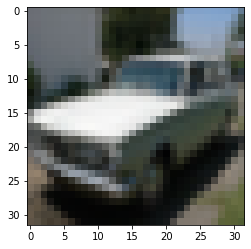

In [11]:
plt.imshow(x_train[96])

In [13]:
y_train[56]

array([5], dtype=uint8)

In [14]:
x_train=x_train/255
x_test=x_test/255

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [17]:
y_test[0]

array([3], dtype=uint8)

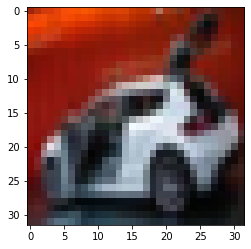

In [18]:
plt.imshow(x_test[6])

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten

In [20]:
model=Sequential()

In [21]:
model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [24]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4819 - accuracy: 0.4675 - val_loss: 1.3487 - val_accuracy: 0.5133
Epoch 2/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1649 - accuracy: 0.5915 - val_loss: 1.0908 - val_accuracy: 0.6128
Epoch 3/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0123 - accuracy: 0.6472 - val_loss: 1.0180 - val_accuracy: 0.6442
Epoch 4/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9023 - accuracy: 0.6867 - val_loss: 1.0136 - val_accuracy: 0.6431
Epoch 5/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8172 - accuracy: 0.7158 - val_loss: 1.0349 - val_accuracy: 0.6525
Epoch 6/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7351 - accuracy: 0.7454 - val_loss: 0.9664 - val_accuracy: 0.6690
Epoch 7/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6661 - accuracy: 0.7683 - val_loss: 0.9380 -

In [25]:
metrics=pd.DataFrame(model.history.history)

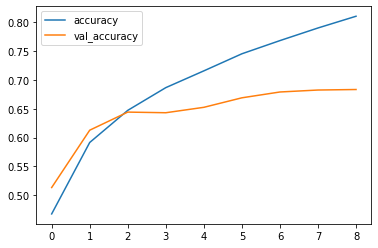

In [26]:
metrics[['accuracy','val_accuracy']].plot()

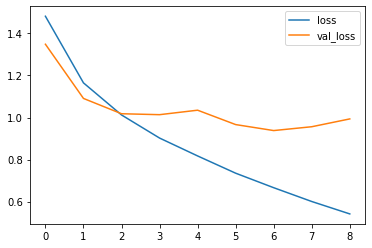

In [27]:
metrics[['loss','val_loss']].plot()

In [28]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9933931827545166, 0.6833999752998352]

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
prediction=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.68      0.75      0.72      1000
           1       0.78      0.81      0.79      1000
           2       0.58      0.56      0.57      1000
           3       0.50      0.49      0.49      1000
           4       0.68      0.58      0.63      1000
           5       0.62      0.51      0.56      1000
           6       0.74      0.79      0.76      1000
           7       0.76      0.73      0.75      1000
           8       0.73      0.82      0.77      1000
           9       0.75      0.79      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



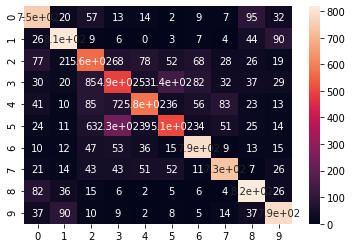

In [33]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)

In [34]:
img=x_test[0]

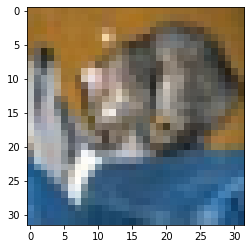

In [37]:
plt.imshow(img)

In [38]:
model.predict_classes(img.reshape(1,32,32,3))

array([3])